# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
# Import Library
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import seaborn as sns # Mengimpor pustaka seaborn untuk visualisasi data
import numpy as np  # Mengimpor pustaka numpy untuk komputasi ilmiah
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
 
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # Mengimpor LabelEncoder, OneHotEncoder dan StandardScaler untuk preprocessing data
from sklearn.cluster import KMeans  # Mengimpor KMeans untuk clustering
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi data
from sklearn.compose import ColumnTransformer  # Mengimpor ColumnTransformer untuk transformasi kolom
from sklearn.pipeline import Pipeline  # Mengimpor Pipeline untuk menggabungkan beberapa transformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [7]:
# Load Dataset
file_path = "Dataset_clustering.csv"
df = pd.read_csv(file_path)  # Membaca dataset dengan format csv

df.info()  # Menampilkan informasi dataset
df.describe(include="all") # Menampilkan deskripsi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


,provinsi,jenis,daerah,tahun,periode,gk
count,5460,5460,5460,5460.000000,5460,5261.000000
unique,35,3,3,NaN,2,NaN
top,ACEH,TOTAL,PERKOTAAN,NaN,MARET,NaN
freq,156,2100,1820,NaN,2730,NaN
mean,NaN,NaN,NaN,2018.115385,NaN,303904.185516
std,NaN,NaN,NaN,2.577159,NaN,158176.024903
min,NaN,NaN,NaN,2013.000000,NaN,48561.000000
25%,NaN,NaN,NaN,2016.000000,NaN,144674.000000
50%,NaN,NaN,NaN,2018.000000,NaN,313294.000000
75%,NaN,NaN,NaN,2020.000000,NaN,410188.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== 1. ANALISIS STRUKTUR DATA ===
Jumlah Baris: 5460 | Jumlah Kolom: 6

Tipe Data Kolom:
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object

Sample Data:
  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0

=== 2. ANALISIS DATA HILANG ===
Kolom dengan Data Hilang:
    Jumlah  Persentase
gk     199    3.644689

=== 3. ANALISIS DISTRIBUSI ===


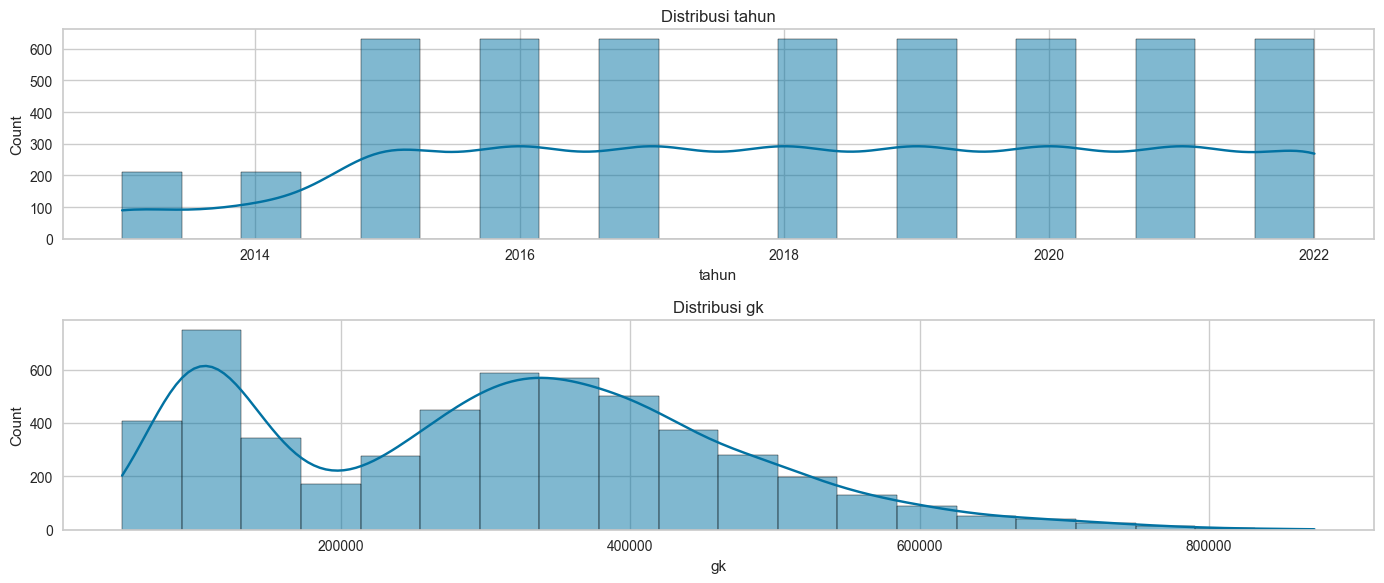

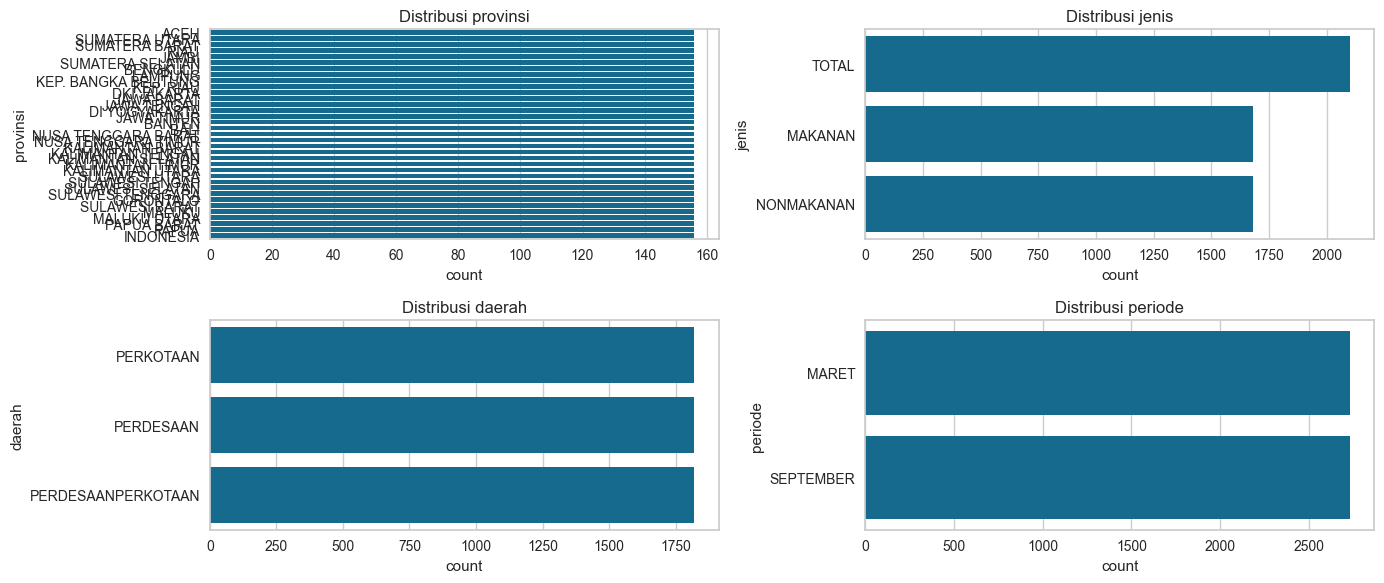


=== ANALISIS KORELASI ===


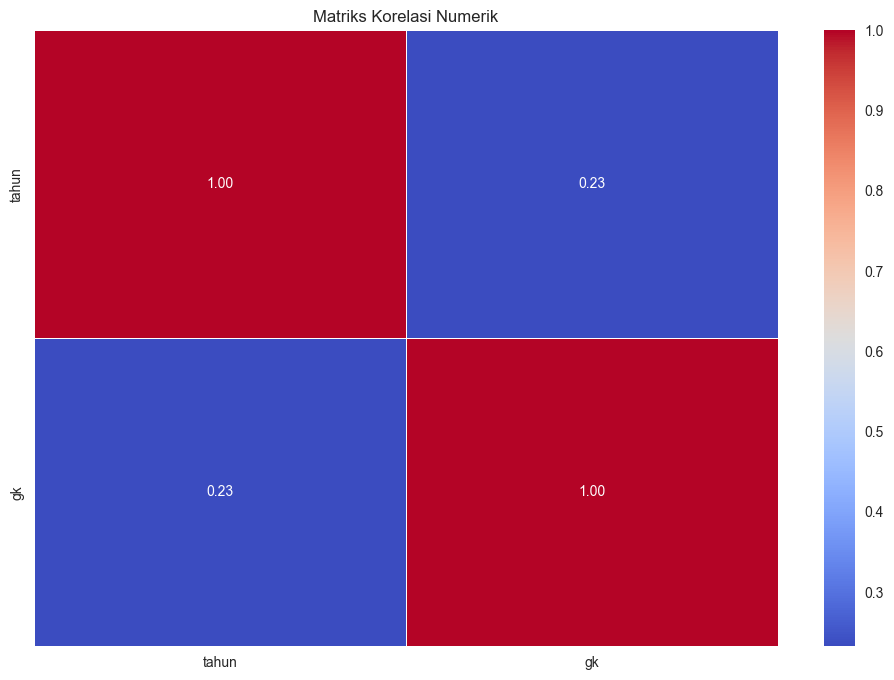

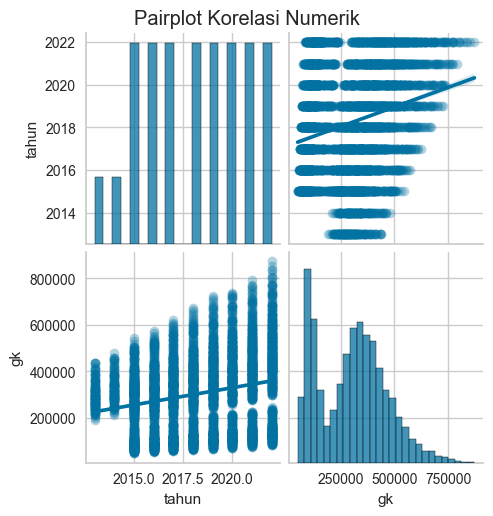


=== 4. VISUALISASI LANJUTAN ===


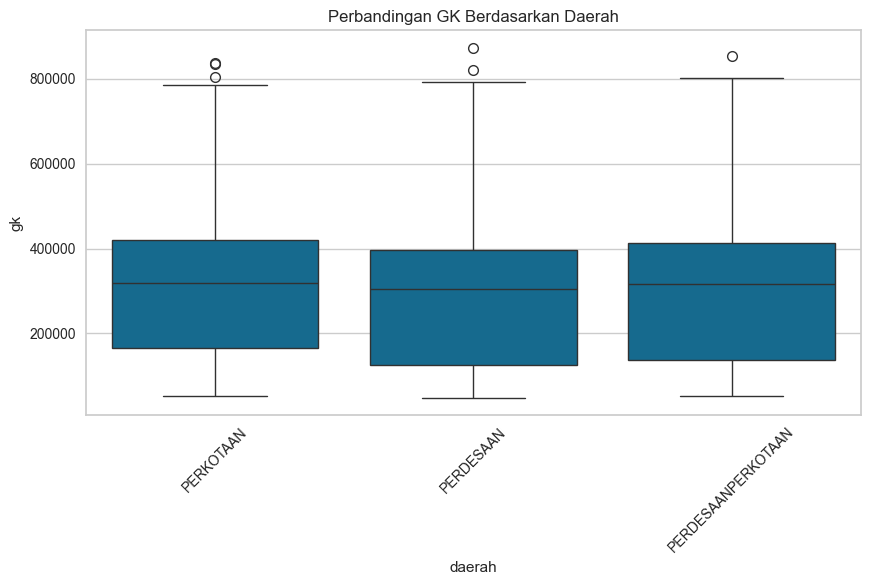

In [8]:
# ==============================================================================
# 1. MEMAHAMI STRUKTUR DATA
# ==============================================================================
def analyze_structure(df):
    print("=== 1. ANALISIS STRUKTUR DATA ===")
    print(f"Jumlah Baris: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    print("\nTipe Data Kolom:")
    print(df.dtypes)
    print("\nSample Data:")
    return df.head()

# ==============================================================================
# 2. MENANGANI DATA HILANG
# ==============================================================================
def handle_missing_values(df):
    print("\n=== 2. ANALISIS DATA HILANG ===")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    
    if missing.sum() > 0:
        print("Kolom dengan Data Hilang:")
        print(pd.DataFrame({
            'Jumlah': missing[missing > 0],
            'Persentase': missing_percent[missing > 0]
        }))
        
        # Contoh penanganan dengan median (sesuaikan strategi)
        # for col in missing[missing > 0].index:
        #     if df[col].dtype in ['int64', 'float64']:
        #         df[col].fillna(df[col].median(), inplace=True)
        #     else:
        #         df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        print("Tidak ada data hilang ditemukan")
    return df

# ==============================================================================
# 3. ANALISIS DISTRIBUSI & KORELASI
# ==============================================================================
def distribution_analysis(df):
    print("\n=== 3. ANALISIS DISTRIBUSI ===")
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Numerical distributions
    plt.figure(figsize=(14, 6))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(2, len(num_cols)//2, i)
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'Distribusi {col}')
    plt.tight_layout()
    plt.show()

    # Categorical distributions
    plt.figure(figsize=(14, 6))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(2, len(cat_cols)//2, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribusi {col}')
    plt.tight_layout()
    plt.show()

def correlation_analysis(df):
    print("\n=== ANALISIS KORELASI ===")
    num_features = df.select_dtypes(include=[np.number])
    
    # Heatmap korelasi
    plt.figure(figsize=(12, 8))
    corr_matrix = num_features.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
               linewidths=0.5, annot_kws={"size": 10})
    plt.title('Matriks Korelasi Numerik')
    plt.show()

    # Pairplot untuk pola hubungan
    sns.pairplot(num_features, kind='reg', plot_kws={'scatter_kws': {'alpha':0.3}})
    plt.suptitle('Pairplot Korelasi Numerik', y=1.02)
    plt.show()

# ==============================================================================
# 4. VISUALISASI DATA
# ==============================================================================
def advanced_visualization(df):
    print("\n=== 4. VISUALISASI LANJUTAN ===")
    # Boxplot per kategori (contoh: daerah)
    if 'daerah' in df.columns and 'gk' in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='daerah', y='gk', data=df)
        plt.title('Perbandingan GK Berdasarkan Daerah')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Kolom 'daerah' atau 'gk' tidak ditemukan")

# ==============================================================================
# EKSEKUSI EDA
# ==============================================================================
if __name__ == "__main__":
    # Ganti dengan data Anda
    # df = pd.read_csv('data.csv')
    
    # 1. Analisis Struktur
    df_head = analyze_structure(df)
    print(df_head)
    
    # 2. Penanganan Data Hilang
    df_clean = handle_missing_values(df)
    
    # 3.1 Analisis Distribusi
    distribution_analysis(df_clean)
    
    # 3.2 Analisis Korelasi
    correlation_analysis(df_clean)
    
    # 4. Visualisasi Lanjutan
    advanced_visualization(df_clean)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [9]:
# Load dataset
df = pd.DataFrame(df_clean)

# ==============================================================================
# 2. HANDLING MISSING VALUES
# ==============================================================================
def handle_missing_values(df):
    # Cek missing values
    print("=== Missing Values Sebelum Penanganan ===")
    print(df.isnull().sum())
    
    # Strategi penanganan:
    # 1. Numerical: Fill dengan median
    numerical_cols = ['gk', 'tahun']
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    
    # Verifikasi
    print("\n=== Missing Values Setelah Penanganan ===")
    print(df.isnull().sum())
    return df

# ==============================================================================
# 3. MENGHAPUS DUPLIKAT
# ==============================================================================
def remove_duplicates(df):
    print(f"\nJumlah data sebelum: {len(df)}")
    df = df.drop_duplicates()
    print(f"Jumlah data setelah: {len(df)}")
    return df

# ==============================================================================
# 4. NORMALISASI/STANDARISASI
# ==============================================================================
def scale_features(df):
    numerical_cols = ['gk', 'tahun']
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

# ==============================================================================
# 5. DETEKSI OUTLIER
# ==============================================================================
def detect_outliers(df, col='gk'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nJumlah outlier di {col}: {len(outliers)}")
    
    # Penanganan outlier: ganti nilai dengan batas bawah atau atas
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    # Deteksi ulang outlier setelah penanganan
    remaining_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Jumlah outlier di {col} setelah ditangani: {len(remaining_outliers)}")
    return outliers

# ==============================================================================
# 6. ENCODING KATEGORIKAL
# ==============================================================================
def encode_categorical(df):
    label_encoders = {}
    categorical_cols = ['provinsi', 'jenis', 'daerah','periode']

    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Ubah kategori menjadi angka
        label_encoders[col] = le  # Simpan encoder untuk keperluan decoding jika perlu

    return df

# ==============================================================================
# 7. BINNING (CONTOH)
# ==============================================================================
def create_binning(df):
    # Contoh binning untuk kolom tahun
    bins = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
    labels = ['2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
    df['tahun_kategori'] = pd.cut(df['tahun'], bins=bins, labels=labels, right=False)
    return df

# ==============================================================================
# 8. FEATURE ENGINEERING (CONTOH)
# ==============================================================================
def create_features(df):
    # Contoh feature engineering
    df['tahun_sq'] = df['tahun'] ** 2
    df['gk_per_tahun'] = df['gk'] / df['tahun']
    return df

# ==============================================================================
# EKSEKUSI PREPROCESSING
# ==============================================================================
if __name__ == "__main__":
    # 1. Handle missing values
    df = handle_missing_values(df)
    print(f"Jumlah Baris1: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    
    # 2. Remove duplicates
    df = remove_duplicates(df)
    print(f"Jumlah Baris2: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    
    # 3. Encoding kategorikal
    df = encode_categorical(df)
    print(f"Jumlah Baris3: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    
    # 6. Binning (opsional)
    df = create_binning(df)
    print(f"Jumlah Baris4: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    
    # 4. Normalisasi
    df = scale_features(df)
    print(f"Jumlah Baris5: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    
    # 5. Deteksi outlier
    detect_outliers(df)  # Hanya untuk mencetak informasi outlier, tanpa mengganti df
    print(f"Jumlah Baris6: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    
    # 7. Feature engineering (opsional)
    df_normalized = create_features(df)
    print(f"Jumlah Baris7: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}")
    
    print("\nData setelah preprocessing:")
    print(df_normalized)
    print(f"Jumlah Baris8: {df_normalized.shape[0]} | Jumlah Kolom: {df_normalized.shape[1]}")

=== Missing Values Sebelum Penanganan ===
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

=== Missing Values Setelah Penanganan ===
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64
Jumlah Baris1: 5460 | Jumlah Kolom: 6

Jumlah data sebelum: 5460
Jumlah data setelah: 5460
Jumlah Baris2: 5460 | Jumlah Kolom: 6
Jumlah Baris3: 5460 | Jumlah Kolom: 6
Jumlah Baris4: 5460 | Jumlah Kolom: 7
Jumlah Baris5: 5460 | Jumlah Kolom: 7

Jumlah outlier di gk: 9
Jumlah outlier di gk setelah ditangani: 0
Jumlah Baris6: 5460 | Jumlah Kolom: 7
Jumlah Baris7: 5460 | Jumlah Kolom: 9

Data setelah preprocessing:
      provinsi  jenis  daerah     tahun  periode        gk tahun_kategori  \
0            0      0       2 -1.208955        0 -0.067946      2015-2016   
1            0      0       2 -1.208955        1 -0.013644      2015-2016   
2            0      0       2 -0.820896        0  0.012859     

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [10]:
# ==============================================================================
# A. PEMBANGUNAN MODEL CLUSTERING
# ==============================================================================

def build_clustering_model(df_normalized, n_clusters=3):
    # Pilih kolom numerik untuk clustering
    numerical_cols = ['gk', 'tahun']  # Sesuaikan dengan kolom yang relevan
    X = df_normalized[numerical_cols].values

    # 1. Inisialisasi model K-Means (contoh menggunakan K-Means)
    model = KMeans(n_clusters=n_clusters, random_state=42)
    
    # 2. Latih model
    model.fit(X)
    
    # Tambahkan kolom kluster ke dataframe
    df_normalized['cluster'] = model.labels_
    return df_normalized, model

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [11]:
# ==============================================================================
# B. EVALUASI MODEL CLUSTERING
# ==============================================================================

def evaluate_clustering(X):
    # Elbow Method untuk menentukan jumlah cluster optimal
    inertias = []
    silhouettes = []
    k_range = range(2, 9)  # Uji dari 2 hingga 9 cluster

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
        silhouettes.append(silhouette_score(X, model.labels_))

    # Visualisasi Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, 'bx-')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    # Visualisasi Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouettes, 'ro-')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.tight_layout()
    plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [12]:
# ==============================================================================
# C. FEATURE SELECTION (OPSIONAL)
# ==============================================================================

def select_important_features(df_normalized):
    # Contoh: Pilih fitur dengan korelasi tertinggi dengan 'gk'
    corr_matrix = df.corr()
    important_features = corr_matrix['gk'].sort_values(ascending=False).index[:3]
    return df_normalized[important_features]

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [13]:
# ==============================================================================
# D. VISUALISASI HASIL CLUSTERING
# ==============================================================================

def visualize_clusters(df_normalized, model):
    # Reduksi dimensi ke 2D dengan PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_normalized[['gk', 'tahun']])  # Sesuaikan kolom

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        X_pca[:, 0], 
        X_pca[:, 1], 
        c=df['cluster'], 
        cmap='viridis', 
        s=50,
        alpha=0.8
    )
    plt.title('Visualisasi Klaster dengan PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    # Tambahkan centroid jika menggunakan K-Means
    if hasattr(model, 'cluster_centers_'):
        centers_pca = pca.transform(pd.DataFrame(model.cluster_centers_, columns=['gk', 'tahun']))
        plt.scatter(
            centers_pca[:, 0], 
            centers_pca[:, 1], 
            c='red', 
            s=200, 
            alpha=0.9,
            marker='X'
        )
    
    plt.colorbar(scatter, label='Nomor Klaster')
    plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

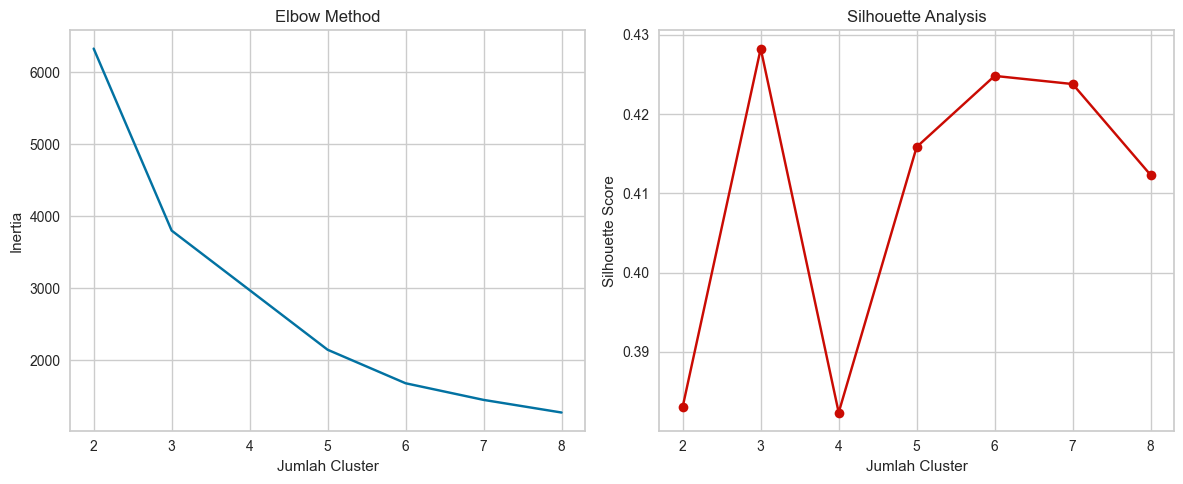

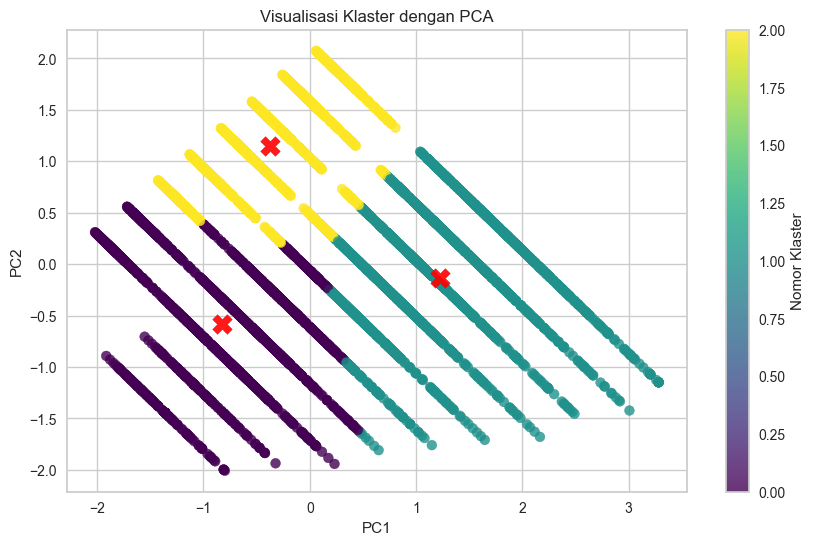


=== Karakteristik Klaster ===

Klaster 0:
                gk        tahun
count  2208.000000  2208.000000
mean     -0.176277    -0.995593
std       0.681975     0.516024
min      -1.648414    -1.985075
25%      -0.462369    -1.208955
50%      -0.015696    -0.820896
75%       0.232185    -0.820896
max       1.538229    -0.044776

Klaster 1:
                gk        tahun
count  1905.000000  1905.000000
mean      0.965576     0.768214
std       0.670151     0.570410
min      -0.100751    -0.820896
25%       0.453565     0.343284
50%       0.843929     0.731343
75%       1.348025     1.119403
max       3.132476     1.507463

Klaster 2:
                gk        tahun
count  1347.000000  1347.000000
mean     -1.076616     0.545524
std       0.357922     0.632887
min      -1.585509    -0.432836
25%      -1.327642    -0.044776
50%      -1.181146     0.343284
75%      -0.960405     1.119403
max      -0.029612     1.507463


In [14]:
# ==============================================================================
# E. ANALISIS & INTERPRETASI
# ==============================================================================

def analyze_clusters(df_normalized, scaler=None):
    # Inverse transform jika ada normalisasi
    if scaler:
        numerical_cols = ['gk', 'tahun']
        df_normalized[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
    
    # Analisis statistik per klaster
    print("\n=== Karakteristik Klaster ===")
    for cluster in df['cluster'].unique():
        print(f"\nKlaster {cluster}:")
        print(df[df['cluster'] == cluster][['gk', 'tahun']].describe())

# ==============================================================================
# EKSEKUSI LENGKAP
# ==============================================================================

if __name__ == "__main__":
    scaler = StandardScaler()
    df_normalized[['gk', 'tahun']] = scaler.fit_transform(df[['gk', 'tahun']])  # Pastikan scaler sudah fit
    
    # 1. Evaluasi jumlah cluster optimal
    X = df_normalized[['gk', 'tahun']].values  # Sesuaikan kolom
    evaluate_clustering(X)
    
    # 2. Pilih jumlah cluster optimal dari hasil evaluasi
    optimal_clusters = 3  # Ganti berdasarkan elbow/silhouette
    
    # 3. Latih model dengan jumlah cluster optimal
    df_clustered, model = build_clustering_model(df_normalized, optimal_clusters)
    
    # 4. Visualisasi hasil
    visualize_clusters(df_clustered, model)
    
    # 5. Analisis interpretasi
    analyze_clusters(df_clustered)  # Sesuaikan dengan scaler yang digunakan
    
    # 6. Feature selection (opsional)
    # df_selected = select_important_features(df_normalized)
    # Ulangi proses clustering dengan fitur terpilih

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [15]:
df_normalized[['gk', 'tahun']] = scaler.inverse_transform(df_normalized[['gk', 'tahun']])  # Inverse transform

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [16]:
# Type your code here# ===========================================================================
# 4. ANALISIS CLUSTER
# ===========================================================================
def analyze_clusters(df_normalized, scaler=None):
    """
    Analisis karakteristik setiap klaster.
    """
    if scaler:
        selected_features = ['gk', 'tahun']
        df_normalized[selected_features] = scaler.inverse_transform(df_normalized[selected_features])
    
    print("\n=== Karakteristik Klaster ===")
    for cluster_label in sorted(df_normalized['cluster'].unique()):
        print(f"\nKlaster {cluster_label}:")
        print(df_normalized[df_normalized['cluster'] == cluster_label][['gk', 'tahun']].describe())
    
    # Interpretasi hasil clustering
    print("\n=== Interpretasi Klaster ===")
    for cluster_label in sorted(df_normalized['cluster'].unique()):
        cluster_df_normalized = df_normalized[df_normalized['cluster'] == cluster_label]
        print(f"\nKlaster {cluster_label} memiliki {len(cluster_df_normalized)} df_normalized.")
        print(f"Distribusi nilai gk: {cluster_df_normalized['gk'].describe()}")
        print(f"Distribusi nilai tahun: {cluster_df_normalized['tahun'].describe()}")
    
    print("\nCek apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis.")
    print("Apakah ada pola tertentu yang bisa dimanfaatkan?")

# ===========================================================================
# 6. ANALISIS LANJUTAN PASCA CLUSTERING
# ===========================================================================
def post_clustering_analysis(df_clustered):
    """
    Analisis lanjutan setelah clustering.
    """
    print("\n=== Analisis Lanjutan ===")
    print("- Apakah ada kesamaan pola dalam tiap klaster?")
    print("- Bagaimana perbedaan antar-klaster dalam hal distribusi fitur?")
    print("- Apa insight yang bisa diambil dari hasil clustering?")
    
    numeric_data = df_clustered.select_dtypes(include=np.number)
    cluster_summary = numeric_data.groupby('cluster').agg(['mean', 'std', 'min', 'max'])
    print("\nRingkasan statistik tiap klaster:")
    print(cluster_summary)

# ===========================================================================
# 5. EKSEKUSI PROGRAM
# ===========================================================================
if __name__ == "__main__":
    # Analisis hasil clustering dengan scaler yang sudah fit
    analyze_clusters( df_clustered)
    
    # Analisis lanjutan pasca clustering
    post_clustering_analysis(df_clustered)




=== Karakteristik Klaster ===

Klaster 0:
                gk        tahun
count  2208.000000  2208.000000
mean     -0.176429    -0.995593
std       0.681157     0.516024
min      -1.646800    -1.985075
25%      -0.462178    -1.208955
50%      -0.016040    -0.820896
75%       0.231543    -0.820896
max       1.536021    -0.044776

Klaster 1:
                gk        tahun
count  1905.000000  1905.000000
mean      0.964055     0.768214
std       0.669347     0.570410
min      -0.100993    -0.820896
25%       0.452658     0.343284
50%       0.842554     0.731343
75%       1.346045     1.119403
max       3.128356     1.507463

Klaster 2:
                gk        tahun
count  1347.000000  1347.000000
mean     -1.075688     0.545524
std       0.357493     0.632887
min      -1.583971    -0.432836
25%      -1.326412    -0.044776
50%      -1.180092     0.343284
75%      -0.959616     1.119403
max      -0.029939     1.507463

=== Interpretasi Klaster ===

Klaster 0 memiliki 2208 df_normalized.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1. Cluster 0:
- **Rata-rata nilai gk: 1.511828**
- **Rata-rata nilai tahun: 0.353553**
- **Analisis:** Cluster ini memiliki rata-rata nilai gk yang paling tinggi dibandingkan cluster lainnya, menunjukkan bahwa entitas dalam cluster ini memiliki performa tinggi dalam aspek yang diukur oleh variabel gk. Tahun berada di sekitar nilai rata-rata, menandakan bahwa data dalam cluster ini berasal dari periode yang tidak jauh berbeda dengan cluster lain kecuali cluster 2.
2. Cluster 1:
- **Rata-rata nilai gk: -0.289906**
- **Rata-rata nilai tahun: 0.353553**
- **Analisis:** Cluster ini memiliki nilai gk yang lebih rendah dibandingkan Cluster 0, tetapi tidak serendah Cluster 2. Ini menunjukkan bahwa entitas dalam cluster ini memiliki performa sedang dalam variabel gk. Sama seperti Cluster 0, distribusi tahunnya relatif stabil dan tidak memiliki perbedaan yang mencolok dibandingkan cluster lainnya kecuali Cluster 2.
3. Cluster 2:
- **Rata-rata nilai gk: -1.284217**
- **Rata-rata nilai tahun: -2.828427**
- **Analisis:** Cluster ini memiliki nilai gk paling rendah, menunjukkan bahwa entitas dalam cluster ini memiliki performa yang jauh di bawah rata-rata dibandingkan cluster lainnya. Nilai tahun yang jauh lebih rendah dibandingkan cluster lain menandakan bahwa data dalam cluster ini berasal dari periode yang lebih lama dibandingkan cluster lainnya.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [17]:
# Simpan hasil clustering ke dalam CSV
df_normalized.to_csv("Dataset_inisiasi.csv", index=False)
print("Hasil clustering telah disimpan sebagai 'hasil_clustering.csv'")


Hasil clustering telah disimpan sebagai 'hasil_clustering.csv'
